In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50): #i % 50 means i  divided by 50
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tokmak
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | brae
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | tura
Processing Record 6 of Set 1 | ancud
Processing Record 7 of Set 1 | lorengau
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | panguna
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | tual
Processing Record 14 of Set 1 | fershampenuaz
Processing Record 15 of Set 1 | tasiilaq
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | hobyo
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | tateyama
Processing Record 22 of Set 1 | touros
Processing Record 23 of Set 1 | zhigansk
Processing Record 24 of Set 1 | maz

Processing Record 39 of Set 4 | saint-philippe
Processing Record 40 of Set 4 | redcar
Processing Record 41 of Set 4 | tocopilla
Processing Record 42 of Set 4 | luba
Processing Record 43 of Set 4 | redmond
Processing Record 44 of Set 4 | saint-augustin
Processing Record 45 of Set 4 | manado
Processing Record 46 of Set 4 | provideniya
Processing Record 47 of Set 4 | north bend
Processing Record 48 of Set 4 | moscow
Processing Record 49 of Set 4 | betioky
Processing Record 50 of Set 4 | leningradskiy
Processing Record 1 of Set 5 | oristano
Processing Record 2 of Set 5 | east london
Processing Record 3 of Set 5 | cassilandia
Processing Record 4 of Set 5 | ponta delgada
Processing Record 5 of Set 5 | hofn
Processing Record 6 of Set 5 | chastyye
Processing Record 7 of Set 5 | chelmza
Processing Record 8 of Set 5 | aitape
Processing Record 9 of Set 5 | moche
Processing Record 10 of Set 5 | ust-kuyga
Processing Record 11 of Set 5 | dunkirk
Processing Record 12 of Set 5 | norman wells
Processin

Processing Record 30 of Set 8 | elizabeth city
Processing Record 31 of Set 8 | huambo
Processing Record 32 of Set 8 | celestun
Processing Record 33 of Set 8 | guerrero negro
Processing Record 34 of Set 8 | bichena
Processing Record 35 of Set 8 | upington
Processing Record 36 of Set 8 | port hedland
Processing Record 37 of Set 8 | hauterive
Processing Record 38 of Set 8 | richard toll
City not found. Skipping...
Processing Record 39 of Set 8 | zeya
Processing Record 40 of Set 8 | usinsk
Processing Record 41 of Set 8 | bubaque
Processing Record 42 of Set 8 | taoudenni
Processing Record 43 of Set 8 | shepsi
Processing Record 44 of Set 8 | lompoc
Processing Record 45 of Set 8 | vallenar
Processing Record 46 of Set 8 | bima
Processing Record 47 of Set 8 | talnakh
Processing Record 48 of Set 8 | batemans bay
Processing Record 49 of Set 8 | palmer
Processing Record 50 of Set 8 | westport
Processing Record 1 of Set 9 | carutapera
Processing Record 2 of Set 9 | san quintin
Processing Record 3 o

Processing Record 17 of Set 12 | avera
Processing Record 18 of Set 12 | narrabri
Processing Record 19 of Set 12 | kahului
Processing Record 20 of Set 12 | taksimo
Processing Record 21 of Set 12 | san carlos de bariloche
Processing Record 22 of Set 12 | storforshei
Processing Record 23 of Set 12 | ciudad bolivar
Processing Record 24 of Set 12 | dzerzhinsk
Processing Record 25 of Set 12 | markova
Processing Record 26 of Set 12 | myaundzha
Processing Record 27 of Set 12 | eureka
Processing Record 28 of Set 12 | tabuk
Processing Record 29 of Set 12 | volovo
Processing Record 30 of Set 12 | lumby
Processing Record 31 of Set 12 | lake havasu city
Processing Record 32 of Set 12 | am timan
Processing Record 33 of Set 12 | ziro
Processing Record 34 of Set 12 | kununurra
Processing Record 35 of Set 12 | sechura
Processing Record 36 of Set 12 | bharatpur
Processing Record 37 of Set 12 | uvinza
Processing Record 38 of Set 12 | havre-saint-pierre
Processing Record 39 of Set 12 | ulaangom
Processing

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tokmak,47.2514,35.7058,70.68,38,0,8.57,UA,2022-08-08 02:07:41
1,Mataura,-46.1927,168.8643,42.48,66,7,9.69,NZ,2022-08-08 02:07:42
2,Brae,60.3964,-1.3530,55.60,95,100,13.82,GB,2022-08-08 01:58:14
3,Ushuaia,-54.8000,-68.3000,38.86,60,0,8.05,AR,2022-08-08 02:07:42
4,Tura,25.5198,90.2201,78.76,91,100,3.69,IN,2022-08-08 02:07:42
5,Ancud,-41.8697,-73.8203,43.23,86,5,3.40,CL,2022-08-08 02:07:43
6,Lorengau,-2.0226,147.2712,84.85,70,92,8.95,PG,2022-08-08 02:07:43
7,Rikitea,-23.1203,-134.9692,71.47,73,100,34.07,PF,2022-08-08 02:07:43
8,Jamestown,42.0970,-79.2353,76.71,65,0,8.05,US,2022-08-08 02:07:44
9,Panguna,-6.3164,155.4848,78.75,72,49,1.43,PG,2022-08-08 02:07:44


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1659925361.177046

In [18]:
today = time.strftime("%x")
today

'08/07/22'

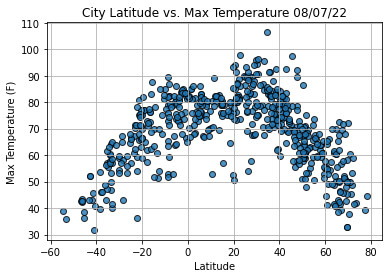

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

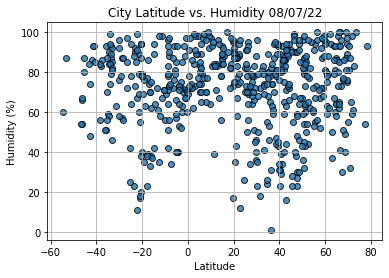

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

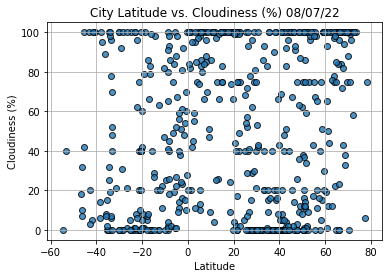

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

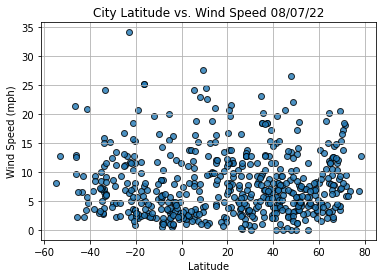

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                Fershampenuaz
Lat                       53.5202
Lng                       59.8117
Max Temp                    63.03
Humidity                       82
Cloudiness                     96
Wind Speed                    7.0
Country                        RU
Date          2022-08-08 02:07:45
Name: 13, dtype: object

In [25]:
#we want cities in the northern hemisphere
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tokmak,47.2514,35.7058,70.68,38,0,8.57,UA,2022-08-08 02:07:41
2,Brae,60.3964,-1.3530,55.60,95,100,13.82,GB,2022-08-08 01:58:14
4,Tura,25.5198,90.2201,78.76,91,100,3.69,IN,2022-08-08 02:07:42
8,Jamestown,42.0970,-79.2353,76.71,65,0,8.05,US,2022-08-08 02:07:44
10,Tiksi,71.6872,128.8694,48.63,98,100,5.86,RU,2022-08-08 02:07:44


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

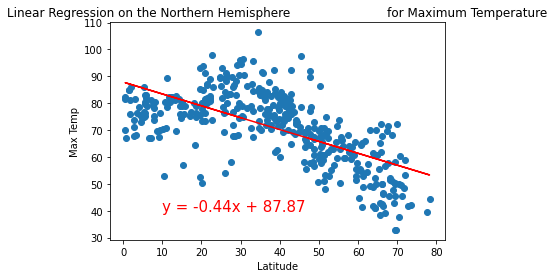

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

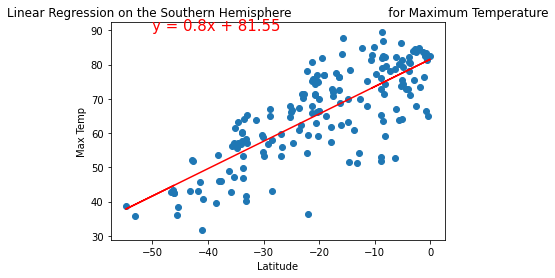

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

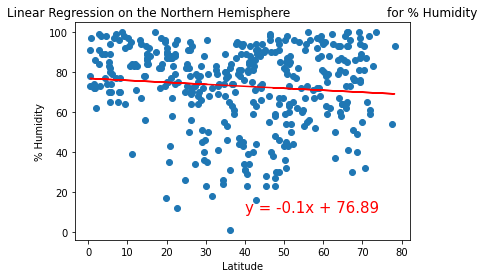

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

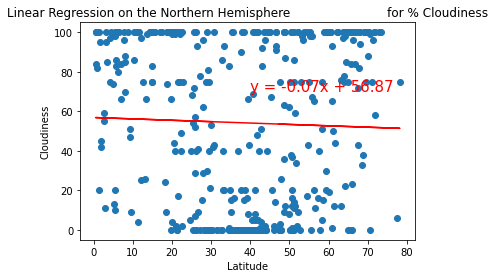

In [30]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', "Cloudiness",(40,70))

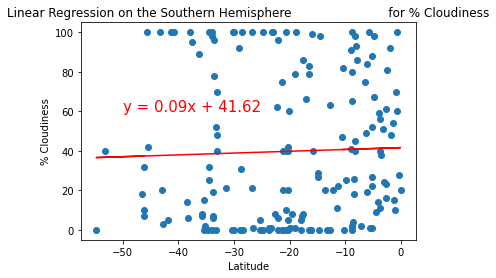

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

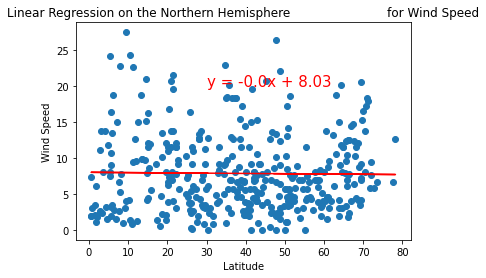

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(30,20))

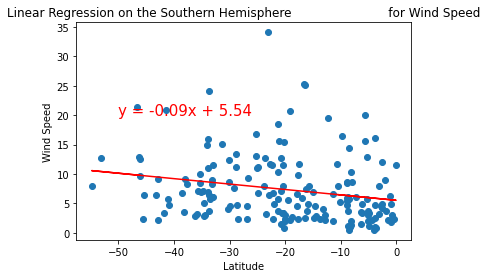

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))

In [34]:
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': -85.6483, 'lat': 30.2455},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 74.8,
  'feels_like': 76.5,
  'temp_min': 73.51,
  'temp_max': 75.97,
  'pressure': 1021,
  'humidity': 96},
 'visibility': 10000,
 'wind': {'speed': 0, 'deg': 0},
 'clouds': {'all': 0},
 'dt': 1659926881,
 'sys': {'type': 2,
  'id': 2075602,
  'country': 'US',
  'sunrise': 1659870291,
  'sunset': 1659918714},
 'timezone': -18000,
 'id': 4163049,
 'name': 'Lynn Haven',
 'cod': 200}